In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam1.csv",encoding='ANSI')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4457,ham,Die... I accidentally deleted e msg i suppose ...,NaN,NaN,NaN
1025,ham,I have a sore throat. It's scratches when I talk,NaN,NaN,NaN
1460,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,NaN,NaN,NaN
4375,spam,"If you don't, your prize will go to another cu...",NaN,NaN,NaN
4529,ham,Don't forget though that I love you .... And I...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. text preprocessing
# 4. Model bulding
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4646,ham,God created gap btwn ur fingers so dat sum1 vr...
2117,ham,Wish u many many returns of the day.. Happy bi...
3216,ham,Come to mahal bus stop.. &lt;DECIMAL&gt;
4589,ham,Tomorrow i am not going to theatre. . . So i c...
4517,ham,That sucks. So what do you got planned for you...


In [9]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
431,ham,Does she usually take fifteen fucking minutes ...
5441,ham,"By the way, make sure u get train to worc fore..."
3182,ham,Dunno i juz askin cos i got a card got 20% off...
1716,ham,Sorry about earlier. Putting out fires.Are you...
831,ham,Hi mate its RV did u hav a nice hol just a mes...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])


In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
# removing duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

# 2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

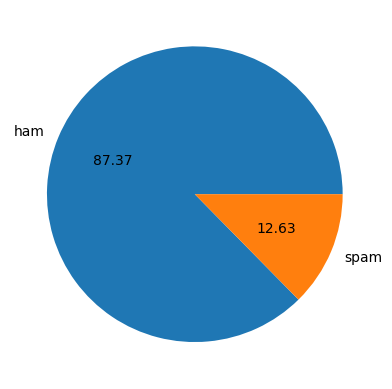

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
#Data is imbalance

In [21]:
# !pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\punjab
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# nltk.download('punkt')

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# nltk.download('punkt_tab')

In [28]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#num of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
import seaborn as sns

In [36]:
# num_characters

<Axes: xlabel='num_characters', ylabel='Count'>

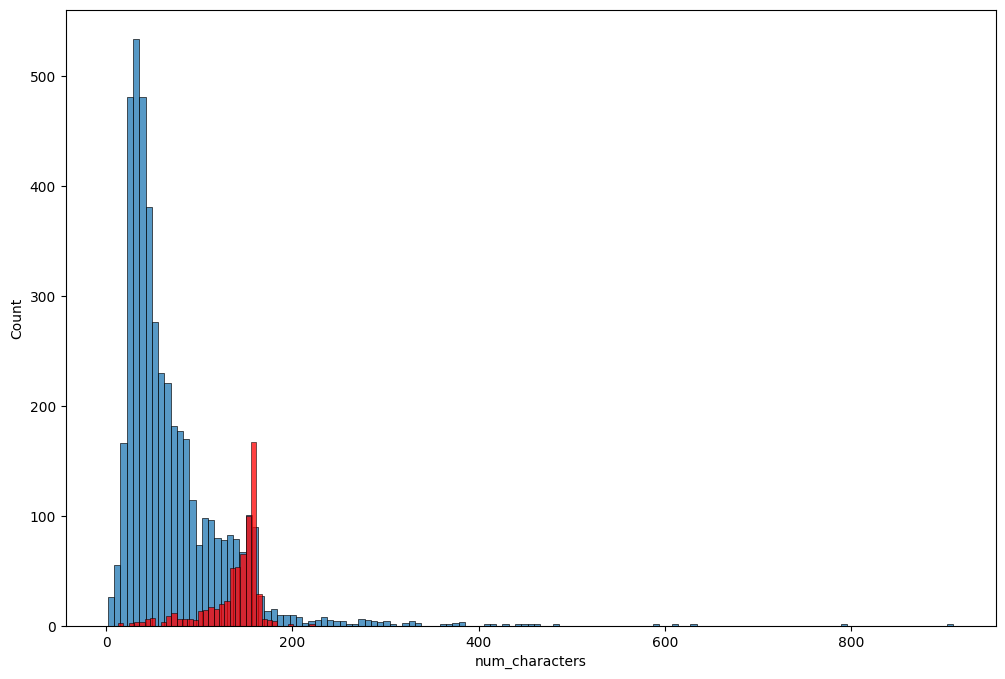

In [37]:
plt.figure(figsize=(12,8))
#  ham
sns.histplot(df[df['target']==0]['num_characters'])
# spam
sns.histplot(df[df['target']==1]['num_characters'],color='r')

In [38]:
# num_words

<Axes: xlabel='num_words', ylabel='Count'>

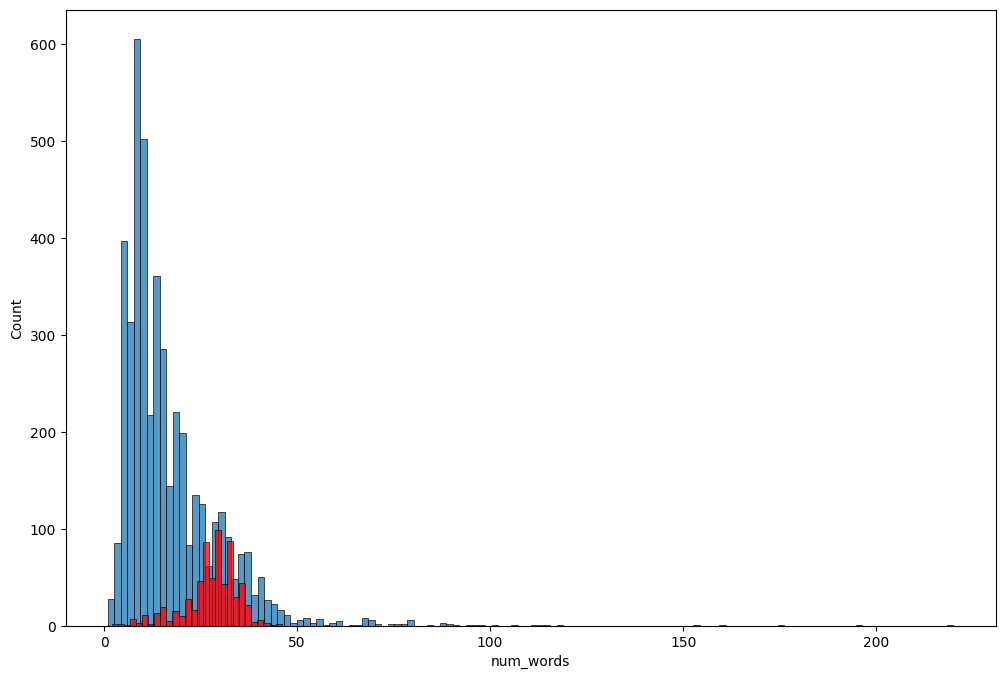

In [39]:
plt.figure(figsize=(12,8))
#  ham
sns.histplot(df[df['target']==0]['num_words'])
# spam
sns.histplot(df[df['target']==1]['num_words'],color='r')

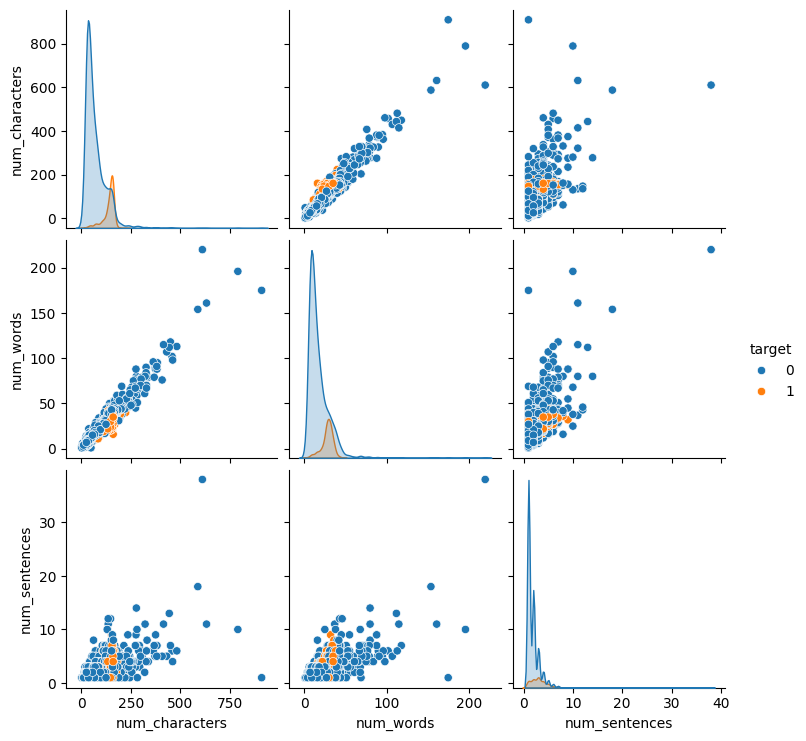

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

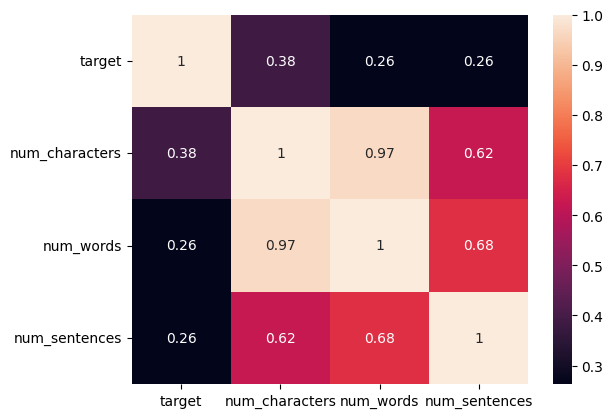

In [41]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

**Data Prepocessing**
1) Lower case
2) Tokenization
3) Remove Spatial characters
4) Removing stop words and punctuations
5) stemming

In [46]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
from nltk.stem.porter import PorterStemmer

In [60]:
ps=PorterStemmer()

In [62]:
ps.stem("love")

'love'

In [66]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [69]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [71]:
df['transformed_text']=df['text'].apply(transform_text)

In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# word cloud 
*most repeated words*

In [76]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)


In [81]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

**Spam word cloud**

In [82]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

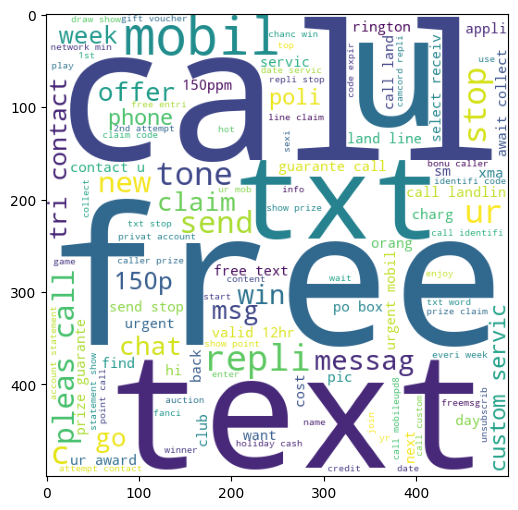

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**ham word cloud**

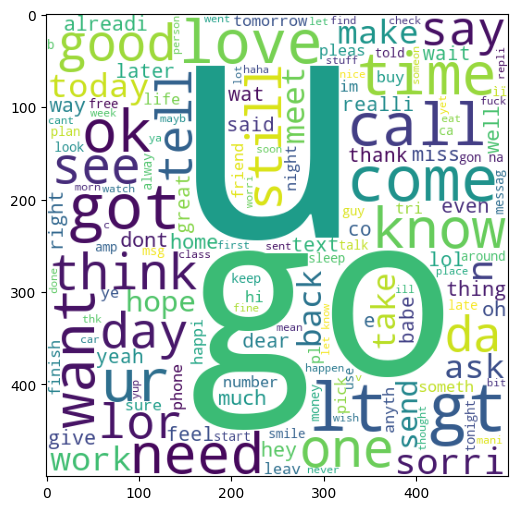

In [88]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

**Top world of ham and spam**

In [116]:
# spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [107]:
len(spam_corpus)

9939

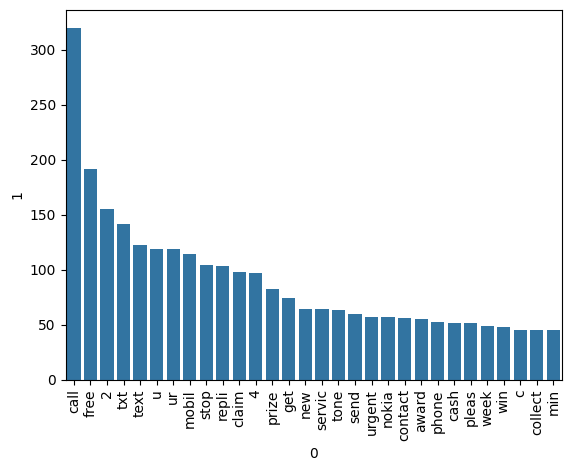

In [113]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [117]:
# ham
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [115]:
len(ham_corpus)

35404

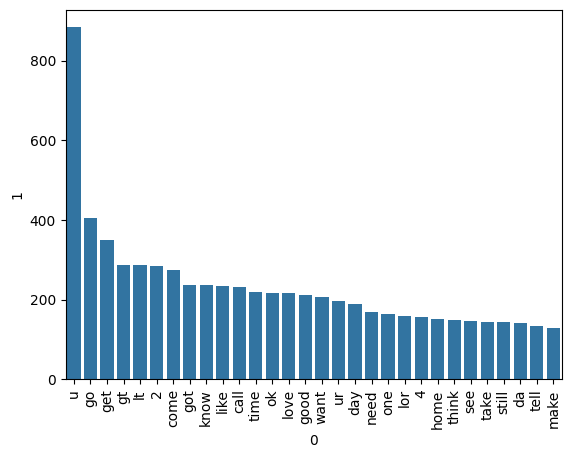

In [118]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# 4.Model Bulding

In [191]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [192]:
# X=cv.fit_transform(df["transformed_text"]).toarray()
X=tfidf.fit_transform(df["transformed_text"]).toarray()

**Scaling**

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [193]:
X.shape

(5169, 3000)

In [194]:
y=df['target'].values

In [176]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [195]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics  import accuracy_score, confusion_matrix, precision_score

In [150]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [187]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [196]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [189]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf-->MNB

In [158]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# # from xgboost import XGBClassifier

In [163]:
# !pip install xgboost

**Testing all Algorithm**

In [164]:
# svc=SVC(kernel="sigmoid",gamma=1.0)
# knc=KNeighborsClassifier()
# mnb=MultinomialNB()
# dtc=DecisionTreeClassifier(max_depth=5)
# lrc=LogisticRegression(solver="liblinear",penalty="l1")
# rfc=RandomForestClassifier(n_estimators=50, random_state=2)
# abc=AdaBoostClassifier(n_estimators=50, random_state=2)
# bc=BaggingClassifier(n_estimators=50, random_state=2)
# etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)

In [165]:
# clfs={
#     "SVC":svc,
#     "KN":knc,
#     "NB":mnb,
#     "DT":dtc,
#     "LR":lrc,
#     "RF":rfc,
#     "AdaBoost":abc,
#     "Bgc":bc,
#     "ETC":etc,
#     "GBDT":gbdt
# }

In [168]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_test)
#     accuracy=accuracy_score(y_test,y_pred)
#     precision=precision_score(y_test,y_pred)
#     return accuracy,precision

In [169]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [4]:
# accuracy_scores=[]
# precision_scores=[]
# for name,clf in clfs.items():
#     current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores)

In [ ]:
# performance_df

In [197]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb')) 

In [3]:
# import steamlit

In [2]:
# !pip install streamlit